## Use of the Python xray Package

The xray package provides for handling of N-dimensional datasets as numpy arrays, but with each axis dimension labelled for mnemonic access and enhanced broadcasting. For more information see the xray project on Github at https://github.com/xray/xray

In [1]:
import numpy as np
import pandas as pd
import xray
xD = xray.DataArray
import matplotlib.pyplot as plt
import scipy.interpolate
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity
def U_(units):
    return Q_(1.0, units)
%matplotlib inline

In [ ]:
# Build a spectral transmission curve
spec_trans = xray.DataArray([ 0.0, 0.1, 0.3, 0.5, 0.7, 1.0, 1.0, 0.8, 0.0],                      
                   [('wvl', [550., 600, 650, 700, 750, 800, 850, 950, 1000])], 
                   name='trn',
                   attrs={'trn_units': '1', 'wvl_units': 'nm', 'extrap_val': 0.0})
spatial_frequencies = xray.DataArray(np.linspace(0.0, 1000.0, 11), name='spf', attrs={'spf_units': 'cy/mm'})

In [ ]:
# Coordinate axis names are used to plot the data
spec_trans.plot()
plt.grid()

In [ ]:
spec_trans.coords['wvl']

In [ ]:
spec_trans.dims

In [ ]:
spec_trans.attrs['wvl_units']

In [ ]:
# Create a new wavelength grid
wvl = xray.DataArray(np.linspace(500., 1050, 51), name='wvl', attrs={'wvl_units': 'nm'})

In [ ]:
wvl


In [ ]:
spc = scipy.interpolate.interp1d(spec_trans.coords['wvl'].data, spec_trans.data, kind='slinear', bounds_error=False, fill_value=0.0)

In [ ]:
plt.plot(wvl.data, spc(wvl.data))
plt.grid()

In [ ]:
spec_trans.data

In [ ]:
wvl


In [ ]:
x = scipy.interpolate.RegularGridInterpolator((spec_trans.coords['wvl'].data,), spec_trans.data, bounds_error=False, fill_value=0.0)

In [ ]:
x(wvl.data)

In [ ]:
spec = xray.DataArray([ 0.0, 0.1, 0.3, 0.5, 0.7, 1.0, 1.0, 0.8, 0.0],                      
                   [('refl', [550., 600, 650, 700, 750, 800, 850, 950, 1000])], 
                   name='refl',
                   attrs={'refl_units': '1', 'wvl_units': 'nm', 'extrap_val': 0.0})

In [ ]:
spec*spec_trans

In [ ]:
w = xray.DataArray([500.,600.,700.], name='wvl', attrs={'units': 'nm'})

In [ ]:
f = xray.DataArray([0.3, .4, .2], [(w.name, w.data)], name='filt', attrs={'units_filt': '1', 'units_'+w.name: w.attrs['units']})

In [ ]:
f

In [ ]:
from . import moglo

In [ ]:
import os


In [ ]:
os.path.abspath(os.path.curdir)

In [ ]:
tau = xD([0.9, 0.9], [('wvl', [500.0, 900.0])], name='trn', attrs={'trn': U_(''), 'wvl': U_('nm')})

In [ ]:
tau

In [ ]:
tau.plot()

In [ ]:
any(spec_trans['wvl'] < 150.0)

In [ ]:
x = Q_(1.0, 'W/m^2/sr/micrometres')

In [ ]:
'{:~}'.format(x).replace(" ", "")[3:]

In [ ]:
y = x.to('W/m**2/sr/nm')
'{:~}'.format(y.units)

In [ ]:
x.magnitude

In [ ]:
def check_convert_units(value_with_units, preferred_units):
    """ Check the units of a quantity and convert to preferred units using Python `pint`

    :param value_with_units: A list with a numeric value or numpy array in the first position and a string
        providing units in the second position. The unit string must be recognisable by the Python `pint` package.
    :param preferred_units: A string expressing the units to which `pint` should convert the scalar
    :return: Value expressed in the preferred units
    """

    # Use pint to convert
    value = Q_(np.asarray(value_with_units[0], dtype=np.float64), value_with_units[1])  # Will blow up if units not recognised
    value = value.to(preferred_units)
    return value.magnitude

In [ ]:
from morticia.sensor import optics
optics.check_convert_units([[20,30,40], 'mm'], 'um')

In [ ]:
spec_trans

In [ ]:
check_convert_units([spec_trans['wvl'], spec_trans.attrs['wvl_units']], 'um')

In [ ]:
spec_trans['wvl'] = np.array([1.,2,3,4,5,6,7,8,9])

In [ ]:
spec_trans

In [ ]:
def xD_check_convert_units(xD, axis_name, preferred_units):
    """ Check and convert units for one or more axes of a xray.DataArray

    :param xD: An xray.DataArray object having an axis called `axis_name` and a value in the `attrs` dictionary
    :param preferred_units: A string providing the preferred units that can be passed to `pint`
    :return: A xray.DataArray, inwhich the values in the named axis have been converted to the preferred units
        The `axis_name_units` field is also updated.
    """

    # Create a pint.Quantity object using the data from the named array
    Q_values = Q_(xD[axis_name].data, xD.attrs[axis_name + '_units'])
    Q_values = Q_values.to(preferred_units)
    xD[axis_name] = Q_values.magnitude
    xD.attrs[axis_name + '_units'] = preferred_units

In [ ]:
xD_check_convert_units(spec_trans, 'wvl', 'nm')

In [9]:
spec_trans = xray.DataArray([ 0.0, 0.1, 0.3, 0.5, 0.7, 1.0, 1.0, 0.8, 0.0],                      
                   [('wvl', [550., 600, 650, 700, 750, 800, 850, 950, 1000])], 
                   name='trn',
                   attrs={'trn_units': '', 'wvl_units': 'nm', 'extrap_val': 0.0})

In [15]:
from morticia.sensor import optics
# This notebook is used for development/testing of the Optics module, so auto reload the Optics module if it changes
%load_ext autoreload
%aimport morticia.sensor.optics
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
x=optics.Lens(efl=[30, 'mm'], fno=1.0, trn=spec_trans)

33
18
<function darray_harmonise_interp at 0x0000000014E82F28>


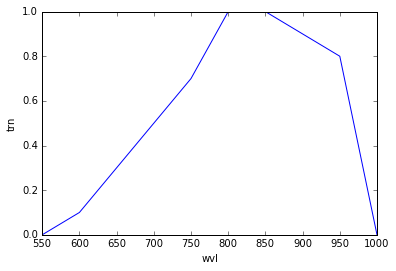

In [17]:
x.trn.plot()

ValueError: Attempted relative import in non-package

In [30]:
import os

In [32]:
os.path.abspath(os.curdir)

'D:\\Projects\\Github\\MORTICIA'